In [86]:
#Gerekli kütübhaneleri yükleğelim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
# penguins verisinin yüklenmesi
df = pd.read_csv('penguins.csv')

In [88]:
#ilk 5 satır
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [89]:
#son 5 satır
df.tail()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [90]:
#satır ve sutun
df.shape

(344, 9)

In [91]:
#her sutunda null değerler toplamı
df.isnull().sum()

,0
id,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [92]:
#dtype object olan sutunlar
df_object= df.select_dtypes(include="object").columns

In [113]:
#dtype numeric olan sutunlar
df_numeric_columns = df.select_dtypes(include="float").columns

In [114]:
df_numeric = df.select_dtypes(include="float")

In [115]:
df_numeric

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [94]:
#genel info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


id sutunu silinecek sebep unik olması .hər bir değeri unik olan bir sutun modele hiç bir şey öğretmez

diğer columnların unik değerlerini görelim

In [95]:
df["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [96]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [97]:
df["sex"].unique()

array(['male', 'female', nan], dtype=object)

In [98]:
df["year"].unique()

array([2007, 2008, 2009])

In [129]:
df[df["year"]==2008]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,female,2008
51,Adelie,Biscoe,40.1,18.9,188.0,4300.0,male,2008
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,female,2008
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,male,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
...,...,...,...,...,...,...,...,...
315,Chinstrap,Dream,53.5,19.9,205.0,4500.0,male,2008
316,Chinstrap,Dream,49.0,19.5,210.0,3950.0,male,2008
317,Chinstrap,Dream,46.2,17.5,187.0,3650.0,female,2008
318,Chinstrap,Dream,50.9,19.1,196.0,3550.0,male,2008


In [100]:
#id sutunu silindi
df.drop(columns=["id"],inplace=True)

species sutunu target değer dokunmuyoruz.(tür)

island sutunu hangi adada olduğunu bildirir ve silmek doğru değil, çünki kaldığı ada, türünü bulmakta yardımcı bir değer ola bilir.

bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g uygun olarak Gaga uzunluğu ,Gaga derinliği ,Yüzgeç uzunluğu, Vücut kütlesi . her birinin türün bulunmasında büyük katkısı vardır. o yüzden kalıcaklar

In [101]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [102]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [125]:
for i in df_numeric:
  print(i,"std------>", df[i].std(),"mean------>",df[i].mean())

bill_length_mm std------> 5.4595837139265315 mean------> 43.9219298245614
bill_depth_mm std------> 1.9747931568167818 mean------> 17.151169590643274
flipper_length_mm std------> 14.061713679356888 mean------> 200.91520467836258
body_mass_g std------> 801.9545356980958 mean------> 4201.754385964912


<Axes: xlabel='bill_length_mm', ylabel='Count'>

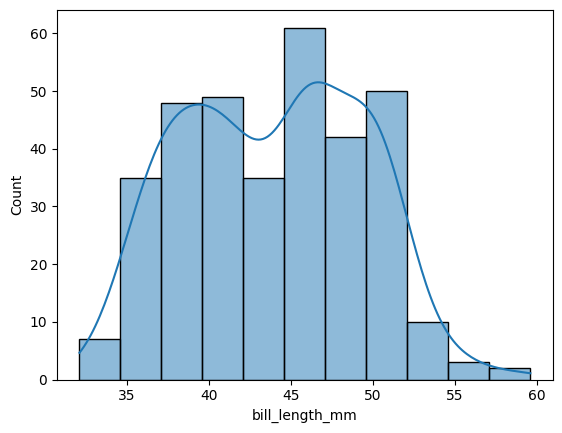

In [80]:
sns.histplot(df["bill_length_mm"],kde=True)

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

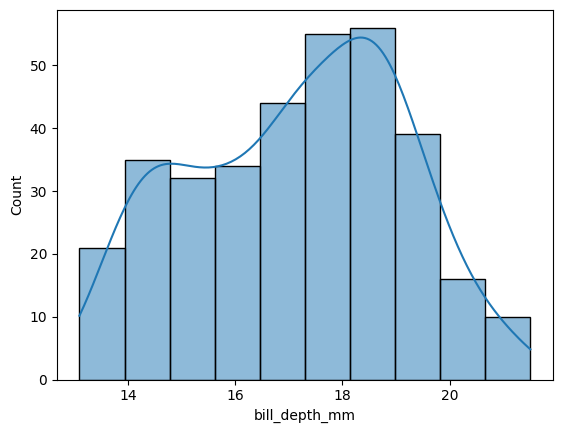

In [42]:
sns.histplot(df["bill_depth_mm"],kde=True)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

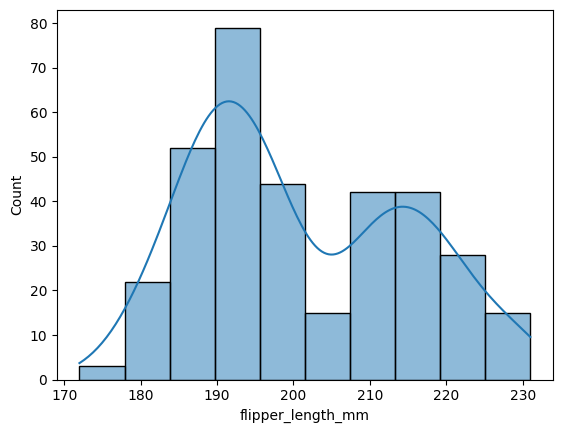

In [45]:
sns.histplot(df["flipper_length_mm"],kde=True)

<Axes: xlabel='body_mass_g', ylabel='Count'>

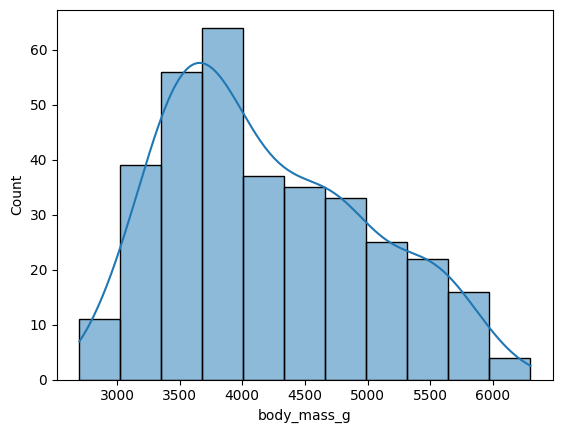

In [46]:
sns.histplot(df["body_mass_g"],kde=True)

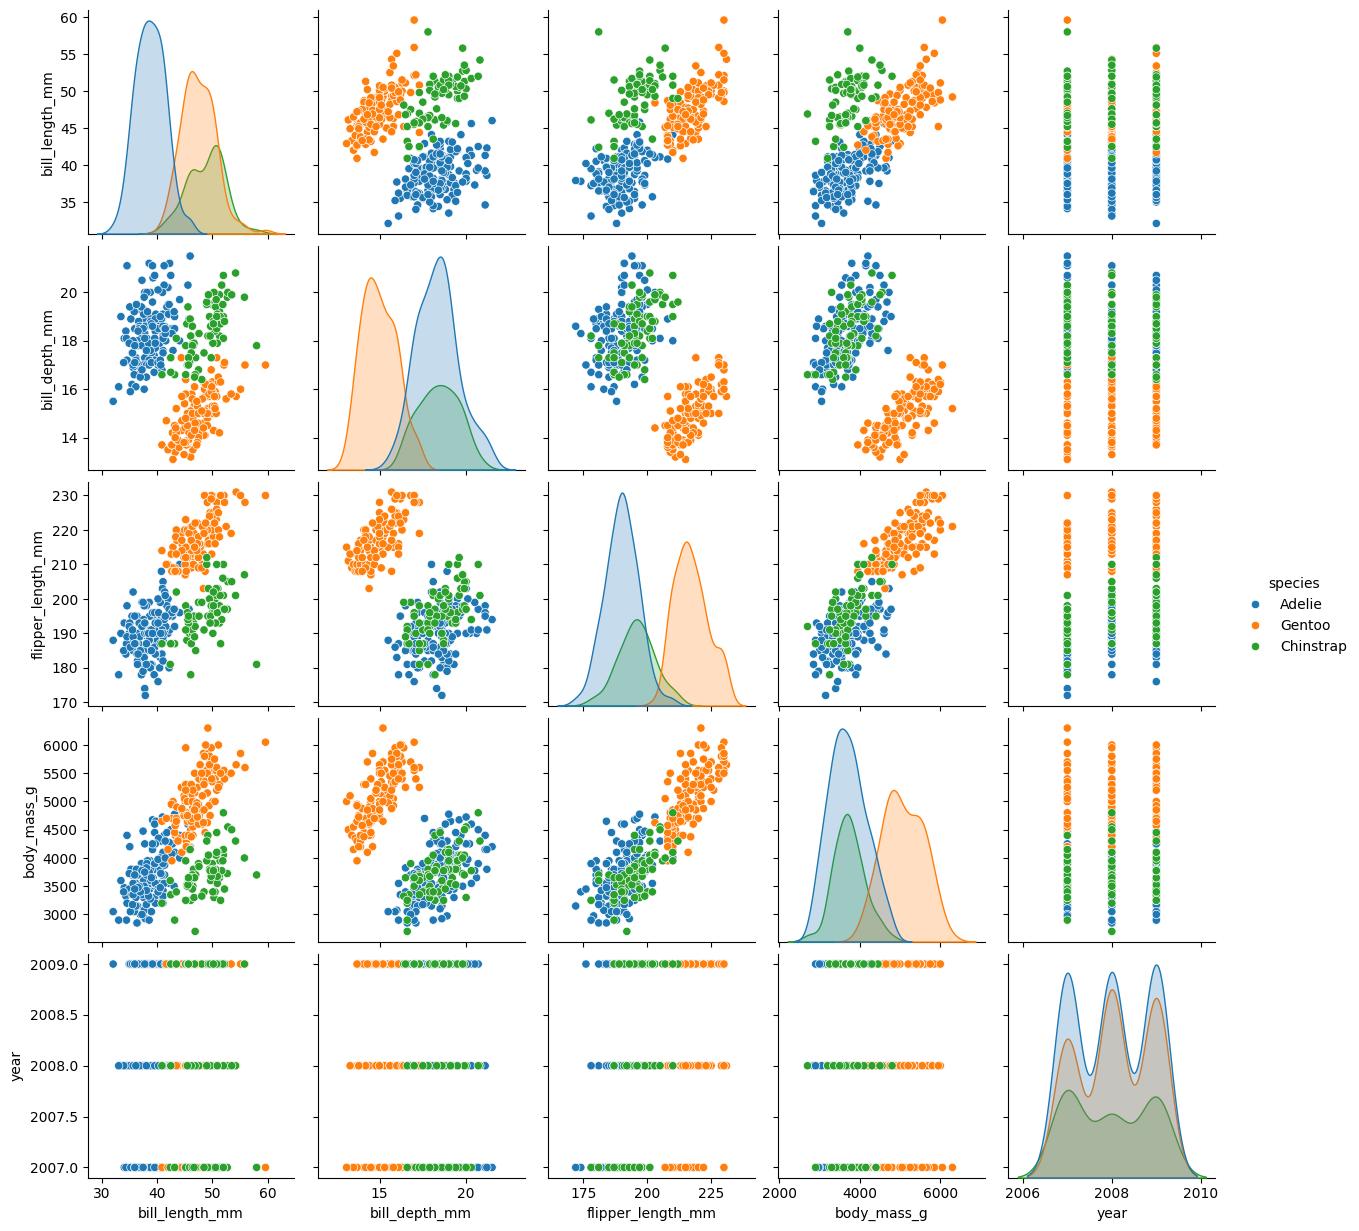

In [147]:
sns.pairplot(df,hue="species")

mesela burdan karar olarak Gentoo nun daha farklı olduğunu yani model öğrenmesinde kolay olacağı görülmektedir

Daha az gaga uzunluğunun Adelie türünde çok olduğu ve ya gaga derinliği en çok olan türün Adelie olduğu görünür

gaga derinligi uzunlugu ve ya diğer parametrelerin yıllara göre çok farklanmadığını görüyoruz .

In [178]:
df["species"].value_counts()
#her bir türün sayı

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [164]:
df["sex"].value_counts()
#cinsiyyet sayı

,count
sex,
male,168
female,165


In [165]:
df['island'].value_counts()
#adaların sayı

,count
island,
Biscoe,168
Dream,124
Torgersen,52


In [179]:
pivot_table = pd.pivot_table(
    df,
    values='bill_length_mm',  # Summarize bill length
    index='species',           # Rows by species
    columns='island',          # Columns by island
    aggfunc='mean'           # Calculate the average bill length
)

print(pivot_table)
#hangi adada hangi tür daha çok

island        Biscoe      Dream  Torgersen
species                                   
Adelie     38.975000  38.501786   38.95098
Chinstrap        NaN  48.833824        NaN
Gentoo     47.504878        NaN        NaN


In [171]:
#Chinstrap mean i Biscoe ve Torgersen de Nan olduğu için ve buradanda gördüğümüz gibi bir hayvanın türü Chinstrapdirse o yalnız Dream adasında var
df[df["species"]=="Chinstrap"]["island"].value_counts()

,count
island,
Dream,68


In [174]:
df[df["species"]=="Chinstrap"]["sex"].value_counts()

,count
sex,
female,34
male,34


In [172]:
df[df["species"]=="Adelie"]["island"].value_counts()

,count
island,
Dream,56
Torgersen,52
Biscoe,44


In [175]:
df[df["species"]=="Adelie"]["sex"].value_counts()

,count
sex,
male,73
female,73


In [180]:
df[df["species"]=="Gentoo"]["island"].value_counts()

,count
island,
Biscoe,124


In [181]:
df[df["species"]=="Gentoo"]["sex"].value_counts()

,count
sex,
male,61
female,58


<Axes: >

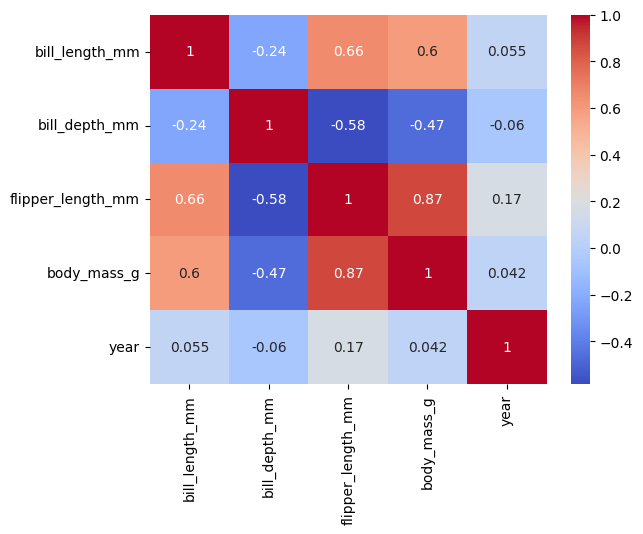

In [182]:
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True)

In [183]:
#year sutunu sile biliriz ,heatmap den gördüğümüz gibi yüksek korelyasyon yok.
# korelyesyonu eksi olan değerler var. biri arttdıqca diğeri azalan. Mesela bill_length_mm artdıkça bill_depth_mm azalır (-0.24)